In [7]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from scipy.ndimage import zoom, gaussian_filter

from wordcloud import WordCloud, STOPWORDS as stopwords, ImageColorGenerator

import matplotlib.pyplot as plt

In [8]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Scouting'
uf = urllib.request.urlopen(url)
html = uf.read()
soup = BeautifulSoup(html, 'html.parser')
text = soup.find_all(text=True)

output = ''
blacklist = [
    '[document]',
    'noscript',
    'header',
    'html',
    'meta',
    'head', 
    'input',
    'script',
    # there may be more elements you don't want, such as "style", etc.
]

for t in text:
    if t.parent.name not in blacklist:
        output += '{} '.format(t)


In [9]:
words = [word.strip() for word in output.split(" ") if word.strip() != '']
words

text = " ".join(words)

In [10]:
text

'Scouting - Wikipedia CentralNotice Scouting From Wikipedia, the free encyclopedia Jump to navigation Jump to search World-wide youth movement .mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em} This article is about the Scout Movement. For other uses, see Scout (disambiguation) . .mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}.mw-parser-output .infobox .navbar{font-size:100%}body.skin-minerva .mw-parser-output .infobox-header,body.skin-minerva .mw-parser-output .infobox-subheader,body.skin-minerva .mw-parser-output .infobox-above,body.skin-minerva .mw-parser-output .infobox-title,body.skin-minerva .mw-parser-output .infobox-image,body.skin-minerva .mw-parser

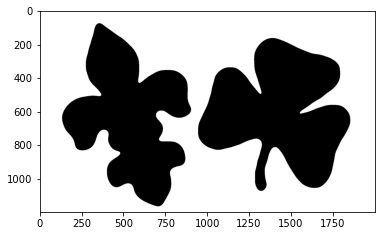

In [26]:
lily = np.array(Image.open("data/pfadililie.jpg"))
lily = np.dot(lily, np.array([1, 1, 1]))
lily += 1
lily[lily == 518] = 255
lily[lily != 255] = 0

lily = gaussian_filter(lily, sigma=(20), order=0)

lily[lily <= 128] = 0
lily[lily > 128] = 255

plt.imshow(lily, cmap="gray")

For colors: https://fffuel.co/cccolor/

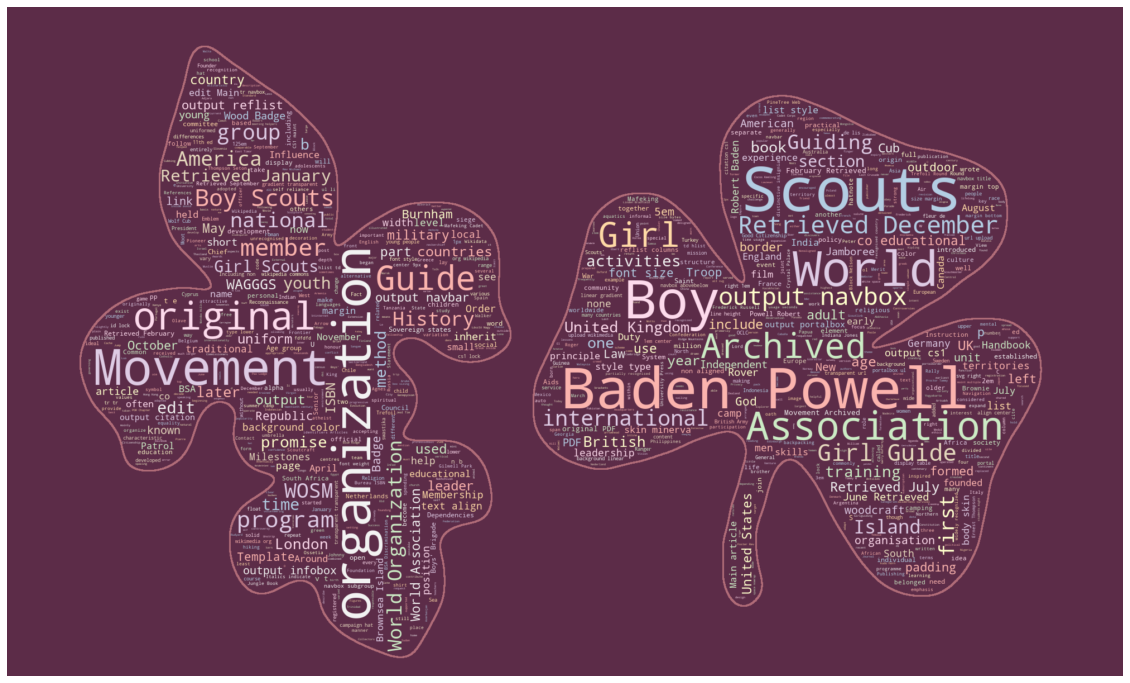

In [28]:
stopwords = set(stopwords)
stopwords.update(["Scouting", "Scout", "parser", "mw"])

wc = WordCloud(
    background_color=(92, 44, 72),
    max_words=1000,
    mask=lily,
    stopwords=stopwords,
    contour_width=4,
    # contour_color=(108, 66, 91),
    contour_color=(176, 108, 120),
    colormap="Pastel1"
)

wc.generate(text)


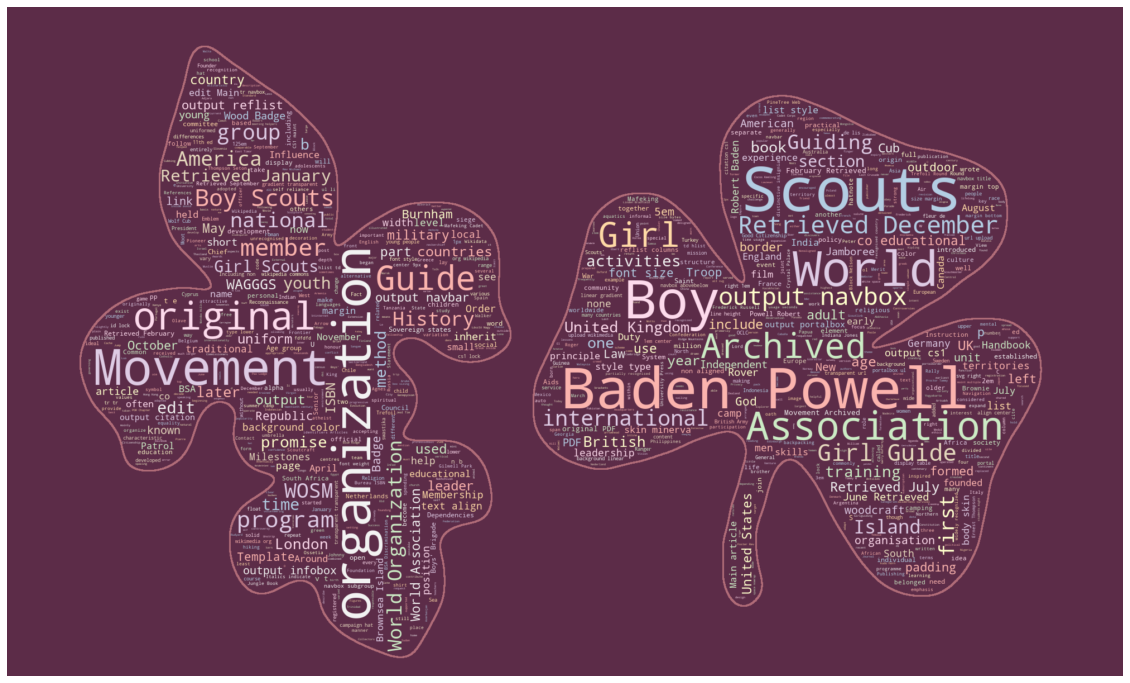

In [29]:

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
